In [1]:
#Importing Modules
import pandas as pd
import numpy as np
import os
import plotly.express as px  
import plotly.graph_objects as go 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import json
import re
import requests
import subprocess
import time 
import sys

In [2]:
#Loading Files
diretorio = "C:/Mestrado_UA/Dissertacao/Dados_analises/"
list = []
list_path = os.listdir(diretorio)
list_path[:]

['analise_dados_exploratory.asv',
 'analise_dados_exploratory.m',
 'analise_dados_spectral.asv',
 'analise_dados_spectral.m',
 'analise_dados_statistical.asv',
 'analise_dados_statistical.m',
 'analise_dados_statistical_original.m',
 'ClassificationLearnerSession_5.mat',
 'Clusters.png',
 'Densidade_Espectral.docx',
 'df15_df27.mldatx',
 'df1_df12.mldatx',
 'df9_df22.mldatx',
 'df_sec_1_df_sec_12.mldatx',
 'df_table.csv',
 'features.csv',
 'features_test.csv',
 'projeto_aplicado.ipynb',
 'projeto_dissertacao.ipynb',
 'projeto_dissertacao_teste.ipynb',
 'projeto_igus.ipynb',
 'QC74.json',
 'QC74_last100.json',
 'QC74_samples',
 'QC75.json',
 'QC75_ClassificationLearnerSession.mat',
 'QC75_ClassificationLearnerSession_2.mat',
 'QC75_ClassificationLearnerSession_3.mat',
 'QC75_ClassificationLearnerSession_4.mat',
 'QC75_ClassificationLearnerSession_Spectral.mat',
 'QC75_datasets',
 'QC75_datasets_invalid',
 'QC75_df1_df15_final.mldatx',
 'QC75_last100.json',
 'QC75_samples',
 'QC75_sample

## LOAD AND EXPLORE TELEMETRIES 


In [3]:
arquivo = 'features.csv'
local_arquivo = os.path.join(diretorio, arquivo)
df = pd.read_csv(local_arquivo, sep=',', encoding='latin-1')

In [4]:
df.head(5)

,rms_df,mean_df,std_df,sk_df,k_df,perc_25,perc_50,perc_75,perc_90
0,0.417058,0.517966,0.418374,-0.322653,-0.589962,-0.528029,-0.478654,0.797535,0.551259
1,0.439250,0.334431,0.440916,-0.145237,-0.449691,-0.221357,-0.066563,0.089896,0.621977
2,-0.901749,-0.702113,-0.899180,1.859262,-0.276090,0.110393,-0.190993,-0.525195,-0.580849
3,0.322015,0.484699,0.323531,0.516340,-0.611644,-0.474656,-0.309578,0.412013,0.645476
4,-0.933977,0.299947,-0.930474,1.909491,0.345687,0.704466,0.146809,-0.867310,-0.802742


In [5]:
df.isna().sum()

rms_df     0
mean_df    0
std_df     0
sk_df      0
k_df       0
perc_25    0
perc_50    0
perc_75    0
perc_90    0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.shape

(83, 9)

In [8]:
df.isna().sum()

rms_df     0
mean_df    0
std_df     0
sk_df      0
k_df       0
perc_25    0
perc_50    0
perc_75    0
perc_90    0
dtype: int64

In [9]:
df.describe()

,rms_df,mean_df,std_df,sk_df,k_df,perc_25,perc_50,perc_75,perc_90
count,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01
mean,1.559663e-15,1.585077e-16,-1.412525e-15,9.630850e-17,2.795622e-16,7.223138e-17,1.872665e-17,-4.012854e-16,2.220446e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.460446e+00,-3.949783e+00,-2.475089e+00,-1.370373e+00,-1.119617e+00,-2.268717e+00,-1.652984e+00,-1.829390e+00,-2.534772e+00
25%,-6.781672e-01,-5.466454e-01,-6.754521e-01,-6.949104e-01,-6.145230e-01,-7.232499e-01,-6.848982e-01,-7.193930e-01,-5.582841e-01
50%,1.040790e-01,5.317827e-02,1.043363e-01,-1.542609e-01,-2.276147e-01,-1.133153e-01,-1.988510e-01,-7.674566e-02,8.174287e-03
75%,6.884166e-01,4.751408e-01,6.897644e-01,4.423404e-01,3.466578e-01,6.323950e-01,1.731974e-01,7.417135e-01,7.257747e-01
max,2.482825e+00,3.622108e+00,2.479605e+00,3.543934e+00,4.781197e+00,2.429190e+00,2.267648e+00,2.643293e+00,2.074314e+00


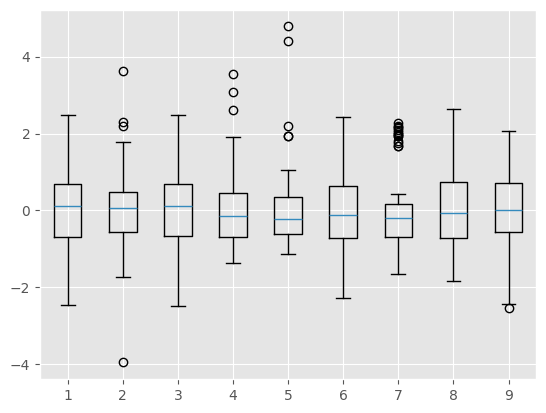

In [10]:
plt.style.use('ggplot')
plt.boxplot(df)
plt.show()

In [11]:
wcss_max_min = [] 
for i in range(1,11):
  kmeans_max_min = KMeans(n_clusters=i, random_state=0, init='k-means++', n_init='auto') 
  kmeans_max_min.fit(X = df[['mean_df', 'rms_df']]) 
  wcss_max_min.append(kmeans_max_min.inertia_) 

In [12]:
for i in range(len(wcss_max_min)):
  print('Cluster:', i ,'- Valor do wcss:', wcss_max_min[i] )

Cluster: 0 - Valor do wcss: 164.00000000000006
Cluster: 1 - Valor do wcss: 98.5002067863244
Cluster: 2 - Valor do wcss: 74.13198659381443
Cluster: 3 - Valor do wcss: 62.187109484943456
Cluster: 4 - Valor do wcss: 50.57993848967172
Cluster: 5 - Valor do wcss: 42.01445460255612
Cluster: 6 - Valor do wcss: 31.772890233530788
Cluster: 7 - Valor do wcss: 22.874436026094287
Cluster: 8 - Valor do wcss: 21.396711032920308
Cluster: 9 - Valor do wcss: 18.02805462001228


In [13]:
grafico_cotovelo_max_min = px.line( x= range(1,11), y=wcss_max_min)
grafico_cotovelo_max_min.show()

In [14]:
kmeans_max_min = KMeans(n_clusters=2, random_state=0, init='k-means++', n_init='auto')
label_cluster_max_min = kmeans_max_min.fit_predict(df[['mean_df', 'rms_df']])

In [15]:
label_cluster_max_min

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
centroides_max_min = kmeans_max_min.cluster_centers_
centroides_max_min

array([[-0.36082809,  0.64604909],
       [ 0.52001695, -0.93107075]])

In [ ]:
df['state'] = label_cluster_max_min
df.reset_index(drop = True).head(5)

,rms_df,mean_df,std_df,sk_df,k_df,perc_25,perc_50,perc_75,perc_90,state
0,0.417058,0.517966,0.418374,-0.322653,-0.589962,-0.528029,-0.478654,0.797535,0.551259,0
1,0.439250,0.334431,0.440916,-0.145237,-0.449691,-0.221357,-0.066563,0.089896,0.621977,0
2,-0.901749,-0.702113,-0.899180,1.859262,-0.276090,0.110393,-0.190993,-0.525195,-0.580849,1
3,0.322015,0.484699,0.323531,0.516340,-0.611644,-0.474656,-0.309578,0.412013,0.645476,0
4,-0.933977,0.299947,-0.930474,1.909491,0.345687,0.704466,0.146809,-0.867310,-0.802742,1


In [ ]:
grafico_cluster = px.scatter(x = df['rms_df'], y = df['mean_df'], color= label_cluster_max_min)
grafico_centroide = px.scatter(x = centroides_max_min[:,0], y = centroides_max_min[:,1], size = [7,7])
grafico_final = go.Figure(data = grafico_cluster.data + grafico_centroide.data)
grafico_final.update_layout(title='Cluster Analisys', xaxis_title='RMS', yaxis_title='Mean')
grafico_final.show()

In [ ]:
df['name_state'] = ''
df.loc[df.state == 0, 'name_state'] = 'Eminent'
df.loc[df.state == 1, 'name_state'] = 'Ok'
df.tail(10)

,rms_df,mean_df,std_df,sk_df,k_df,perc_25,perc_50,perc_75,perc_90,state,name_state
73,-0.223461,0.184185,-0.220720,-0.112431,0.186739,0.365744,0.339227,-0.560576,-0.248641,1,Ok
74,0.256931,0.154546,0.259073,-0.944091,-0.107456,0.101738,0.062364,-0.234378,0.140323,0,Eminent
75,-1.149255,-0.505400,-1.145727,0.383283,0.685696,0.864243,0.415257,-1.310499,-1.255566,1,Ok
76,1.316333,-0.204007,1.317071,-0.592826,-0.813082,-1.245765,-1.086991,1.580443,1.294971,0,Eminent
77,0.462766,0.058341,0.464688,-0.854207,-0.778629,-0.675090,-0.828174,1.061799,0.613484,0,Eminent
78,2.482825,-1.276327,2.479605,-1.361724,-1.119617,-2.268717,-1.376640,2.643293,2.074314,0,Eminent
79,0.009662,-0.911709,0.010423,0.497643,-0.176869,-0.390865,-0.512839,0.006966,-0.173200,0,Eminent
80,0.104079,-1.005606,0.104336,-0.006158,-0.082084,-0.299058,-0.460468,-0.126118,-0.057194,0,Eminent
81,1.211880,-1.695263,1.207428,-1.248790,-0.820084,-1.176692,-0.851134,1.078377,0.974053,0,Eminent
82,1.502823,-0.495973,1.502964,-1.021575,-0.990104,-1.600235,-1.227897,1.912433,1.417599,0,Eminent
